In [3]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [7]:
oneyear = pd.read_csv('1Y .csv', index_col = 0)
twoyear = pd.read_csv('2Y.csv', index_col = 0)
threeyear = pd.read_csv('3Y.csv', index_col = 0) 
fouryear = pd.read_csv('4Y.csv', index_col = 0) 
fiveyear = pd.read_csv('5Y.csv', index_col = 0) 
sevenyear = pd.read_csv('7Y.csv', index_col = 0) 
tenyear = pd.read_csv('10Y.csv', index_col = 0) 
thirtyyear = pd.read_csv('30Y.csv', index_col = 0) 


df = pd.DataFrame({"OneYear": oneyear["Price"], "TwoYear": twoyear["Price"], "ThreeYear": threeyear["Price"] , 
                   "FourYear": fouryear["Price"] , "FiveYear": fiveyear["Price"] , "SevenYear": sevenyear["Price"] ,
                   "TenYear": tenyear["Price"] , "ThirtyYear": thirtyyear["Price"]})


df.corr(min_periods=3)

df.dropna(inplace= True)


In [8]:
# Initialize to reduce the data up to the number of components that explains 99% of the variance.
model = PCA(n_components = 3)
# Fit transform
x_pca = model.fit_transform(df)
# Plot explained variance

x_pca = PCA(n_components = 3, svd_solver = 'full').fit(df)
print(x_pca.explained_variance_ratio_); print()
print("Reduced dimensions can explain{:.4f}".format(sum(x_pca.explained_variance_ratio_)),"% of the variance in the original data"); print()
print(x_pca.components_.shape[0])

[0.98024585 0.01607782 0.00289319]

Reduced dimensions can explain0.9992 % of the variance in the original data

3


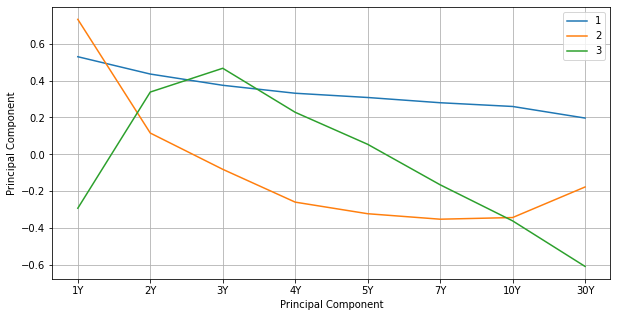

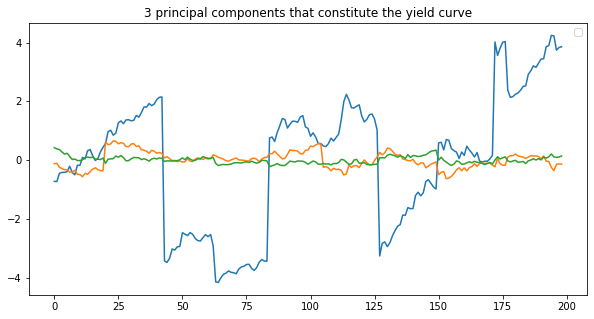

In [23]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Principal Component')
plt.plot(np.transpose(x_pca.components_))
plt.legend('123')
plt.xlabel('Principal Component')
x = [0,1, 2, 3, 4, 5, 6, 7]
labels = ['1Y', '2Y', '3Y', '4Y', '5Y', '7Y','10Y','30Y']
plt.xticks(x, labels)
plt.grid(True)
plt.show();
vals = x_pca.transform(df)
plt.figure(figsize=(10,5))
plt.title('3 principal components that constitute the yield curve')
plt.legend('123')
plt.plot(vals);


PC1 explains over 98.02% of the total variation in the yield curve data set from January 1st to October 7th, and PC2 explains close to 1.61% of total variation and combining over 99.6%. And PC3 explains about .29% of the total variation in the yield curve. Therefore, rather than using all PCs in the subsequent calculation, we will only use PC1, PC2, and perhaps PC3 in further calculations as these encapsulate the majority of the total variance.

Interpretation of First three Principal Components that explain 99.92% of the variance in this data set.

PC1: Captures most level shifts within the yield curve, when the entire term structure moves in the same general direction; i.e. forward rates all succintly moving up or down.

PC2: Second PC corresponds to changes in the slope of the yield curve, situations where the shorter term forward rates move in contrast to the longer term forward rates

PC3: The third PC corresponds to changes in curvature in the yield curve, i.e. situations where short and long term move in parallel with each other but the "belly" of the yield curve moves in opposite directions. Therefore, I would assume PC3 is most important for butterfly trades.

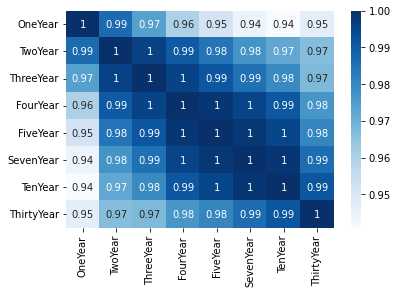

In [30]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

Thus, I can say that there has not been a lot of trades that correspond to the belly of the curve from the time period of Jan 1, 2022 to Oct 07, 2022 as this PC only explains about .29% of the total variation in the data set. 

Additionally, when looking at the above correlation matrix we see that all of the tenors are highly correlated with one another, which makes sense as the PC1, which corresponds to level shifts in the yield curve, explains the vast majority of the total variation in this data set. 